In [1]:
#Debugging finopt
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../../')
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

from matplotlib import markers
from matplotlib import colors
clist = colors.cnames.keys()
mlist = markers.MarkerStyle().markers.keys()

#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, createIfAbsent, saveHDF5
from optvaeutils.viz import getName,stitchMNISTSamples

#STORAGE FOR FINAL RESULT
result   = {}

In [2]:
from optvaemodels.vae import VAE
import optvaemodels.vae_learn as VAE_learn
import optvaemodels.vae_evaluate as VAE_evaluate
import optvaemodels.vae_learn as VAE_learn
import itertools,time
from utils.misc import readPickle

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, cuDNN 4007)
/home/rahul/.local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
from datasets.load import loadDataset
import sys
sys.path.append('../../')
from optvaedatasets.load import loadDataset as LDVAE
DATA = 'binarized-wikipedia-small'
DATA = '20newsgroups'
if DATA == 'binarized_mnist':
    dataset = loadDataset(DATA)
elif DATA == 'binarized-wikipedia-small' or '20newsgroups':
    dataset = LDVAE(DATA)
print dataset.keys()

['data_type', 'vocabulary', 'dim_observations', 'train_y', 'train', 'valid', 'labels-group', 'test', 'test_y']


In [4]:
EP    = '30'
rfile = '../../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

In [ ]:
EP = '260'
rfile = '../../expt/chkpt-20newsgroups-none/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-none-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

In [5]:
suffix= '-EP'+EP+'-params.npz'
rfile+= suffix
pfile = rfile.split('uid')[0]+'uid-config.pkl'
params= readPickle(pfile)[0]
vae   = VAE(params, paramFile=pfile, reloadFile=rfile)

	<<Reloading Model>>
	<<Loading structure (../../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-config.pkl) and model (../../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-params.npz) / opt (../../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-optParams.npz) weights>>
	<<Nparameters: 2354003>>

/data/ml2/rahul/theanomodels/models/__init__.py:180: UserWarning: iter_ctr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:180: UserWarning: anneal found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:180: UserWarning: lr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")



	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Evaluation: Setting opt_method: ADAM, 100 steps w/ 8e-3 lr>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>
	<<# additional updates: 0>>
	<<Modifying : [q_logcov_b,q_1_b,q_logcov_W,q_0_W,q_mu_W,q_1_W,q_0_b,q_mu_b]>>
	<<Inference with dropout :0.0001>>
	<<Done creating functions for training>>
	<<_buildModel took : 58.9579 seconds>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>


In [8]:
X = dataset['test'].toarray().squeeze()
idx_good = np.where(X.sum(1)>0.)[0]
print idx_good.shape,X.shape,idx_good[:10]
labels   = dataset['test_y']
labels   = labels[idx_good]
X = X[idx_good]
print X.shape,labels.shape

(7472,) (7502, 2000) [0 1 2 3 4 5 6 7 8 9]
(7472, 2000) (7472,)


In [ ]:
if params['data_type']=='bow':
    evaluate     = VAE_evaluate.visualizeBOWModel(vae,X)
    test_results = VAE_evaluate.evaluateBound(vae, X, batch_size = params['batch_size'])
    for k in test_results:
        evaluate[k+'_eb'] = test_results[k]
    sfile =rfile.split('-EP')[0]+'-evaluate.h5'
    saveHDF5(sfile,evaluate)
    print 'Saved to:',sfile

In [ ]:
#Visualize latent dimensions
idxlist = np.random.permutation(evaluate['mu_viz_2'].shape[0])[:1000]
label   = labels[idxlist]
plt.scatter(evaluate['mu_viz_2'][idxlist,0],evaluate['mu_viz_2'][idxlist,1],c=label)

In [9]:
if vae.params['opt_type']=='finopt':
    _,mu,_,KL  = vae.inferencef(X.astype('float32'))
else:
    _,mu,_,KL  = vae.inference0(X.astype('float32'))
print mu.shape

(7472, 100)


In [10]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
mu_viz = model.fit_transform(mu)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


([], <a list of 0 Text yticklabel objects>)

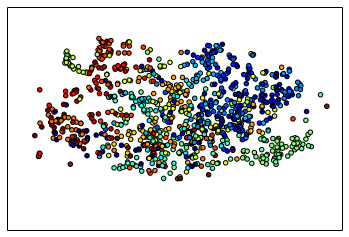

In [47]:
#Visualize latent dimensions
idxlist = np.random.permutation(mu_viz.shape[0])[:1000]
label   = labels[idxlist]
print np.unique(label)
plt.scatter(mu_viz[idxlist,0],mu_viz[idxlist,1],c=label)
plt.xticks([])
plt.yticks([])

In [45]:
print dataset['labels-group']
clist= dataset['labels-group'].values()
print clist,label

{0: 'alt.atheism', 1: 'comp.graphics', 2: 'comp.os.ms-windows.misc', 3: 'comp.sys.ibm.pc.hardware', 4: 'comp.sys.mac.hardware', 5: 'comp.windows.x', 6: 'misc.forsale', 7: 'rec.autos', 8: 'rec.motorcycles', 9: 'rec.sport.baseball', 10: 'rec.sport.hockey', 11: 'sci.crypt', 12: 'sci.electronics', 13: 'sci.med', 14: 'sci.space', 15: 'soc.religion.christian', 16: 'talk.politics.guns', 17: 'talk.politics.mideast', 18: 'talk.politics.misc', 19: 'talk.religion.misc'}
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(250, 250)


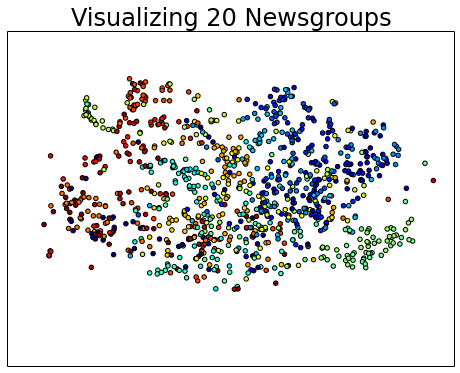

In [49]:
# Make plot with vertical (default) colorbar

from matplotlib import cm
fig, ax = plt.subplots(figsize=(8,6))

data = np.clip(np.random.randn(250, 250), -1, 1)
print data.shape

#cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.scatter(mu_viz[idxlist,0],mu_viz[idxlist,1], c=label)
ax.set_title('Visualizing 20 Newsgroups')
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('20newsgroups.pdf',bbox_inches='tight')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cbar = fig.colorbar(cax, ticks=np.arange(1,21))
#cbar.ax.set_yticklabels(clist)  


In [32]:
print np.arange(1,21),clist

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
